In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.api as nm
from sklearn.metrics import r2_score



In [81]:
numerical = pd.read_csv('Clean_Data_Frame_From_Lab_v3_num.csv')
numerical

,Unnamed: 0,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1
4,4,5035.035257,37405,63,8.0,99,3.0,4,287.556107,2
...,...,...,...,...,...,...,...,...,...,...
9129,9129,2771.663013,59855,74,30.0,82,4.0,1,355.200000,1
9130,9130,19228.463620,0,187,14.0,32,0.0,2,897.600000,2
9131,9131,5259.444853,61146,65,7.0,68,0.0,6,273.018929,1
9132,9132,23893.304100,39837,201,11.0,63,0.0,2,381.306996,2


In [82]:
numerical.drop(['Unnamed: 0'],axis=1,inplace=True)

data.drop(['State', 'Response', 'Coverage', 'Education'],axis=1,inplace=True)
data

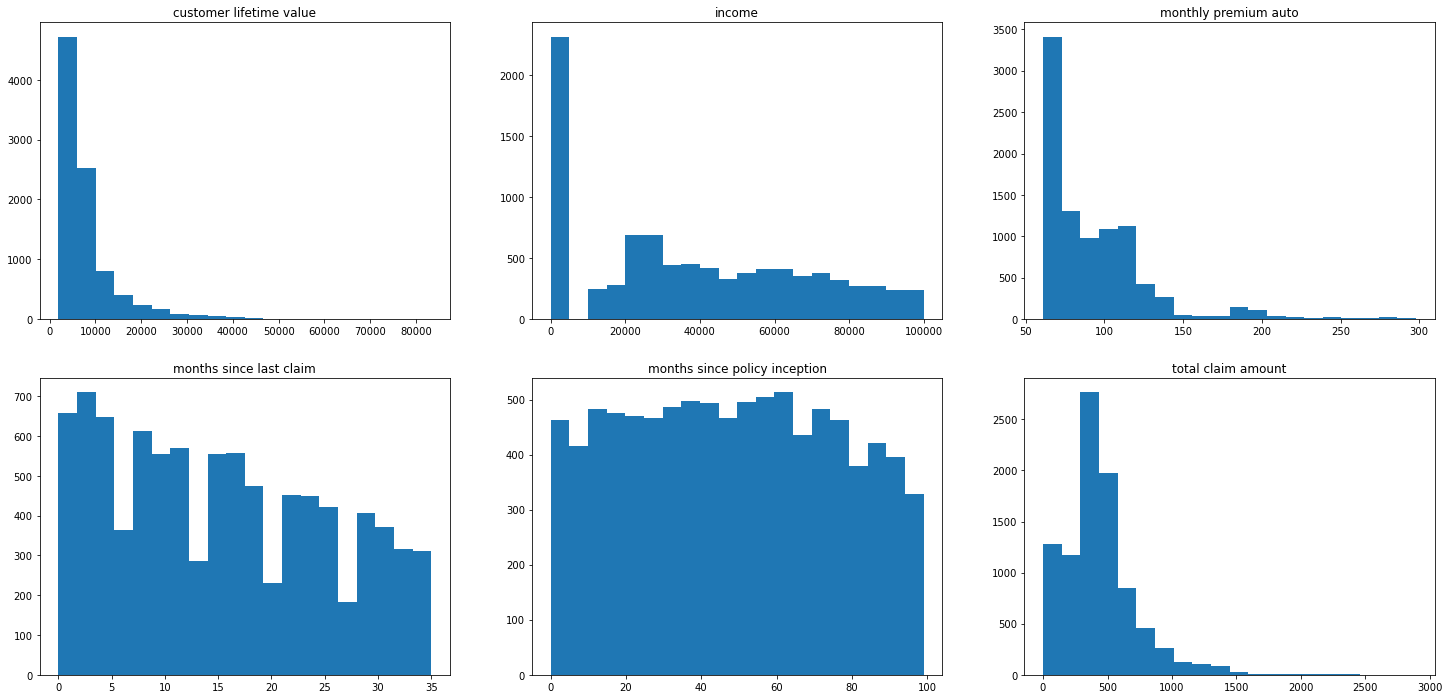

In [83]:
fig, axs = plt.subplots(2, 3, figsize=(25, 12))
for i, col in enumerate(data[['customer lifetime value','income','monthly premium auto','months since last claim','months since policy inception','total claim amount']]):
    ax = axs[i//3, i%3]
    ax.hist(data[col], bins=20)
    ax.set_title(col)
plt.show()


In [84]:
X=numerical.drop(["total claim amount"],axis=1)
Y=numerical["total claim amount"]
Y

0       292.800000
1       744.924331
2       480.000000
3       484.013411
4       287.556107
           ...    
9129    355.200000
9130    897.600000
9131    273.018929
9132    381.306996
9133    618.288849
Name: total claim amount, Length: 9134, dtype: float64

In [85]:
X['customer lifetime value_temp'] = LabelEncoder().fit(X['customer lifetime value']).transform(X['customer lifetime value'])
X.head()


,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,month,customer lifetime value_temp
0,4809.216960,48029,61,7.0,52,0.0,9,2,2755
1,2228.525238,0,64,3.0,26,0.0,1,1,78
2,14947.917300,22139,100,34.0,31,0.0,2,2,7171
3,22332.439460,49078,97,10.0,3,0.0,2,1,7660
4,5035.035257,37405,63,8.0,99,3.0,4,2,3078


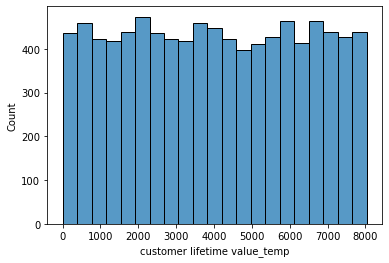

In [86]:
sns.histplot(X['customer lifetime value_temp'])
plt.show()

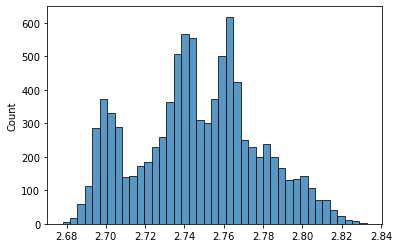

In [87]:
arr, lmbda = stats.boxcox(X['customer lifetime value'])
sns.histplot(arr)
plt.show()

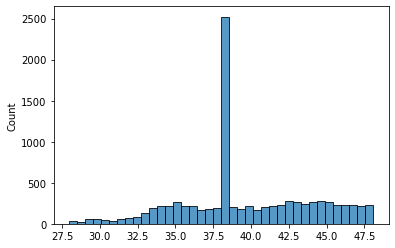

In [88]:
X["income_temp"]=np.where(X["income"]<0,0,X["income"])
X["income_temp"]=X["income_temp"].replace(0,X["income"].mean())

arr, lmbda=stats.boxcox(X["income_temp"])
sns.histplot(arr)
plt.show()

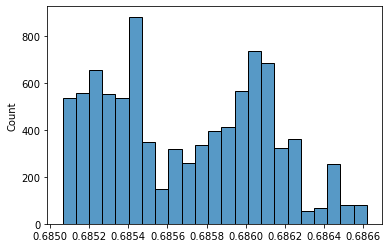

In [89]:
arr, lmbda=stats.boxcox(X["monthly premium auto"])
sns.histplot(arr)
plt.show()

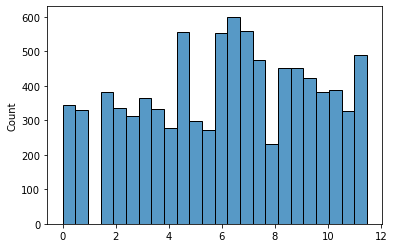

In [90]:
X["months since last claim_temp"]=np.where(X["months since last claim"]<0,0,X["months since last claim"])
X["months since last claim_temp"]=X["months since last claim_temp"].replace(0,X["months since last claim"].mean())

arr, lmbda=stats.boxcox(X["months since last claim_temp"])
sns.histplot(arr)
plt.show()

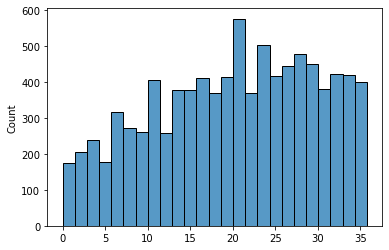

In [91]:
X["months since policy inception_temp"]=np.where(X["months since policy inception"]<0,0,X["months since policy inception"])
X["months since policy inception_temp"]=X["months since policy inception_temp"].replace(0,X["months since policy inception"].mean())

arr, lmbda=stats.boxcox(X["months since policy inception_temp"])
sns.histplot(arr)
plt.show()

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.4,random_state=100)
len(X)
len(X_test)


3654

In [93]:
model = sm.OLS(Y_train,X_train).fit()

In [94]:
predictions = model.predict(X_test)


In [95]:
r2_score(Y_test,predictions)


0.5169311943747121

In [96]:
r2_score(Y_test,predictions)


0.5169311943747121

In [97]:
X.to_csv('X_data.csv')


In [98]:
Y.to_csv('Y_data.csv')
